# Clustering of random points visualization
#### Basic Algorithm for K-Means.
- Step 1: Randomly pick K points to place K centroids
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [2]:
df = pd.DataFrame(np.random.rand(1000,2)*100)
df

,0,1
0,14.894285,52.136935
1,55.263180,88.824333
2,52.282022,80.701154
3,43.907487,70.213758
4,61.050847,37.214508
...,...,...
995,58.917970,86.335749
996,86.594047,63.775566
997,59.627193,61.751465
998,53.401439,44.113861


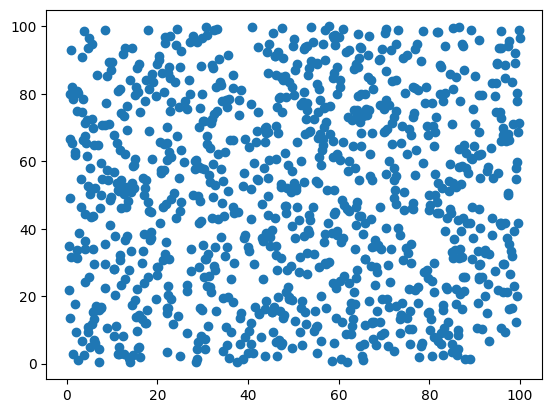

In [3]:
plt.scatter(df[0],df[1])

In [4]:
k= 5
centroids = pd.DataFrame(np.random.rand(k,2)*100)
print(centroids)

           0          1
0  18.638177  84.111808
1  88.055442  63.805970
2  98.159251  17.278705
3  96.487526  26.183191
4  91.464671  56.752286


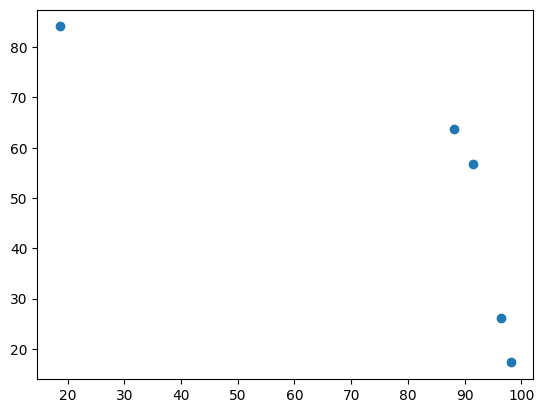

In [5]:
plt.scatter(centroids[0],centroids[1])

In [6]:
for ind in centroids.index:
    print(ind)

0
1
2
3
4


In [7]:
cluster = {}
for ind_C in centroids.index:
    key = 'cluster_'+str(ind_C)
    cluster[key]=[]
print(cluster)


{'cluster_0': [], 'cluster_1': [], 'cluster_2': [], 'cluster_3': [], 'cluster_4': []}


In [8]:
def dist (a,b):
    return int(math.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2))

In [9]:
def comp_dicts(dict1,dict2):    
    return dict1==dict2
    if dict1.keys() != dict2.keys():
        print('keys are different')
        return False
    for key in dict1.keys():
        if len(dict1[key]) != len(dict2[key]):
            print('number of rows are different')
            return False
        for id in range(len(dict1[key])):
            coordinates = dict1[key][id]
            coordinates2 = dict2[key][id]
            diff_x = abs(coordinates[0]-coordinates2[0])
            diff_y = abs(coordinates[1]-coordinates2[1])
            if diff_y > 0.1 or diff_x >0.1:
                print('value difference threshold not reached')
                return False
    return True

In [10]:
cluster_old = {'key':'value'}
colors_list = ['r','g','b','c','y','m','k','purple','darkred','orange']
colors = {key0 : color for key0,color in zip(cluster.keys(),colors_list)}
print(colors)

{'cluster_0': 'r', 'cluster_1': 'g', 'cluster_2': 'b', 'cluster_3': 'c', 'cluster_4': 'y'}


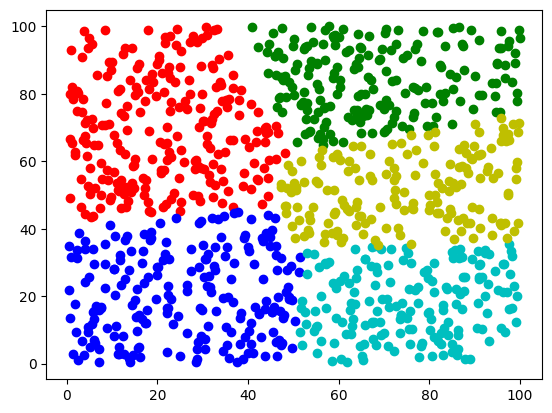

In [19]:
c=0
while not comp_dicts(cluster_old,cluster):
    print(c)
    cluster_old = copy.deepcopy(cluster)

    cluster.clear()
    for ind_C in centroids.index:
        key = 'cluster_'+str(ind_C)
        cluster[key]=[]

    for ind1 in df.index:
        distance = float('inf')
        for ind2 in centroids.index:
            dist_check = dist(df.iloc[ind1],centroids.iloc[ind2])            
            if dist_check<distance:
                distance = dist_check
                cluster_no = ind2
        key = 'cluster_'+str(cluster_no)
        cluster[key].append([df[0][ind1],df[1][ind1]])

    
    for id in np.arange(len(centroids)):
        sumx=0
        sumy=0
        cluster_no = 'cluster_'+str(id)
        for a in np.arange(len(cluster[cluster_no])):
            sumx+=cluster[cluster_no][a][0]
            sumy+=cluster[cluster_no][a][1]
        centroids[0][id] = sumx/len((cluster[cluster_no]))
        centroids[1][id] = sumy/len((cluster[cluster_no]))    
    c+=1
for key in cluster:
    for x,y in cluster[key]:
        plt.scatter(x,y, c=colors[key])


In [13]:
print(cluster['cluster_1'][0])

[55.263179697509734, 88.82433344762094]


In [14]:
print(cluster['cluster_1'][0][0])

55.263179697509734


In [15]:
for id in np.arange(len(centroids)):
    x=[]
    y=[]
    cluster_no = 'cluster_'+str(id)
    for a in np.arange(len(cluster[cluster_no])):
        x.append(cluster[cluster_no][a][0])
        y.append(cluster[cluster_no][a][1])
    centroids[0][id] = sum(x)/len(x)
    centroids[1][id] = sum(y)/len(y)
print(centroids)

           0          1
0  21.424692  69.217495
1  67.756884  83.932975
2  26.078760  20.543982
3  75.722059  18.237946
4  74.734266  51.698364


In [16]:
x=[]
y=[]
for a in np.arange(len(cluster['cluster_1'])):
    x.append(cluster['cluster_1'][a][0])
    y.append(cluster['cluster_1'][a][1])
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)

In [17]:

print(cluster_old.keys())

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])
